In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [31]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [32]:
bostonDF = pd.DataFrame(data, columns=["CRIM","ZN","INDUS","CHAS", "NOX","RM","AGE", "DIS","RAD","TAX","PTRATIO","B" ," LSTAT" ])
bostonDF["PRICE"] = target

# 회귀 트리 

선형회귀는 회귀 계수의 관계를 모두 선형으로 가정 <br>
; 일반적으로 선형회귀는 회귀 계수를 선형으로 결합하는 회귀함수를 구해 여기에 독립변수를 입력해 결괏값을 예측하는 것

비선형 회귀 역시 비선형회귀함수를 통해 결괏값을 예측 <br>
; 다만 비선형회귀는 회귀계수의 결합이 비선형

머신러닝 기반의 회귀는 회귀 계수를 기반으로 하는 최적 회귀 함수를 도출하는 것이 주요 목표<br>
<-> 이 절에서는 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식을 소개 

트리 기반의 회귀는 회귀 트리를 이용하는 것<br>
즉, 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측 <br>
회귀 트리는 분류 트리와 크게 다르지 않음. <br>
**다만 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과는 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산**

- CART(Clasification And Regresion Trees) : 이름에서도 알 수 있듯이 분류뿐만 아니라 회귀도 가능하게 해줌 <br>

결정트리, 랜덤포레스트, GBM, XGBoost, LighIGBM 앞선 모든 트리 기반 알고리즘은 분류뿐 만 아니라 회귀도 가능<br>
트리 생성이 CART 알고리즘에 기반하고 있기 때문<br> 

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [34]:
y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"],axis=1, inplace=False)

In [35]:
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring="neg_mean_squared_error",cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)


print("5교차 검증의 개별 negative mse scores:", np.round(neg_mse_scores,2))
print("5교차 검증의 rmse scores:", np.round(rmse_scores,2))
print("5교차 검증의 평균 rmse:{0:.3f}".format(avg_rmse))

5교차 검증의 개별 negative mse scores: [ -7.88 -13.14 -20.57 -46.23 -18.88]
5교차 검증의 rmse scores: [2.81 3.63 4.54 6.8  4.34]
5교차 검증의 평균 rmse:4.423


In [36]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores= cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("####", model.__class__.__name__, "####")
    print("5교차 검증의 평균 RMSE: {0:.3f}".format(avg_rmse))

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]

for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

#### DecisionTreeRegressor ####
5교차 검증의 평균 RMSE: 5.978
#### RandomForestRegressor ####
5교차 검증의 평균 RMSE: 4.423
#### GradientBoostingRegressor ####
5교차 검증의 평균 RMSE: 4.269
#### XGBRegressor ####
5교차 검증의 평균 RMSE: 4.251
#### LGBMRegressor ####
5교차 검증의 평균 RMSE: 4.646


회귀트리 Regressor 클래스는 선형회귀와 다른 처리방식이므로 회귀계수를 제공하는coef 속성이없음.<br> 
대신featureimportances를 이용해 피처별 중요도를 알수있음. <br>

<AxesSubplot:>

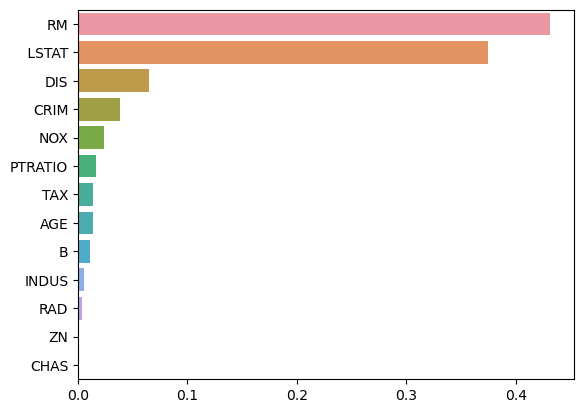

In [38]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators = 1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터셋을 적용해 학습  
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns )
feature_series = feature_series.sort_values(ascending = False) # 내림차순
sns.barplot(x = feature_series, y = feature_series.index)
     

(100, 2)


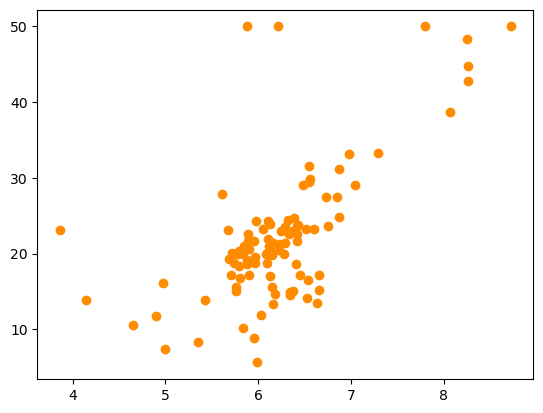

In [39]:
bostonDF_sample = bostonDF[['RM','PRICE']]
bostonDF_sample = bostonDF_sample.sample( n =100, random_state = 0)
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")

In [40]:
import numpy as np
from sklearn.linear_model import LinearRegression


lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth = 2)
rf_reg7 = DecisionTreeRegressor(max_depth = 7)


X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)


lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

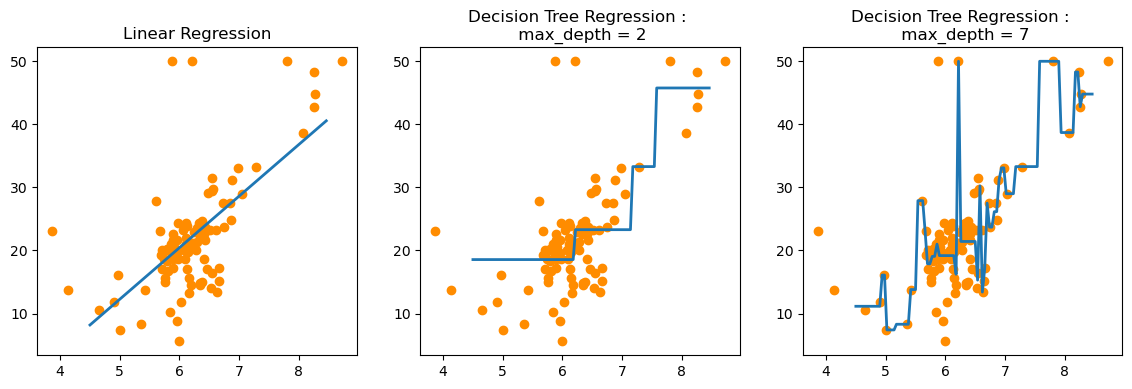

In [41]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize = (14,4), ncols = 3)

# X축 값을 4.5~ 8.5로 변환하며 입력했을 때 선형회귀와 결정 트리 회귀 예측선 시각화
#선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
ax1.plot(X_test, pred_lr,label = "linear", linewidth = 2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression : \n max_depth = 2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
ax2.plot(X_test, pred_rf2, label = "max_depth : 3", linewidth = 2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression : \n max_depth = 7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c = "darkorange")
ax3.plot(X_test, pred_rf7, label = "max_depth : 7", linewidth = 2)

> 선형 회귀는 직선으로 예측 회귀선을 표현하는데 반해, 회귀 트리의 경우 분할되는 데이터 지점에 따라 브랜치를 만들면서 계단 형태로 회귀선을 만듦.

> max_depth=7인 경우에는 학습 데이터 세트의 이상치 데이터도 학습하면서 복잡한 계단 형태의 회귀선을 만들어 과적합이 되기 쉬운 모델이 되었음

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category = RuntimeWarning)

bike_df = pd.read_csv("/Users/ijiseon/Desktop/train.csv")
print(bike_df.shape)
bike_df.head()
     

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [2]:
# 문자열을 datetime 타입으로 변경. 
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [3]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1, inplace=True)

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN 등의 이슈로 log()가 아닌 log1p()를 이용해 RMSLE 계산
def rmsle(y,pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [5]:
#다음과 같은 rmsle 구현은 오버플로나 언더플로 오류를 발생하기 쉽습니다.
def rmsle2(y,pred):
    msle = mean_squared_log_error(y,pred)
    rmsle = np.sqrt(mse)
    return rmsle

> log()보다는 log1p()를 이용하는데 이는 1+log() 값으로 log 변환값에 1을 더하므로 이런 문제를 해결해줌 <br>
log1p()로 변환된 값은 다시 넘파이의 expm1() 함수로 쉽게 원래의 스케일로 복원될 수 있음

#### 휘귀모델을 적용하기 전에 데이터 세트에 대해서 먼저 처리해야 할 사항
- 결괏값이 정규 분포로 돼 있는지 확인한느 것
- 카테곡리형 회귀 모델의 경우 원-핫 인코딩으로 피처를 인코딩

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = bike_df['count']
X_features = bike_df.drop(['count'],axis = 1,inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                    test_size = 0.3, random_state = 0)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.165, RMSE: 140.900, MAE: 105.924


In [7]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측값을 서로 비교 할 수 있도록 생성
    result_df = pd.DataFrame(y_test.values, columns = ['real_count'])
    result_df['predicted_count'] = np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
   
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending = False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops = 5)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0


<AxesSubplot:>

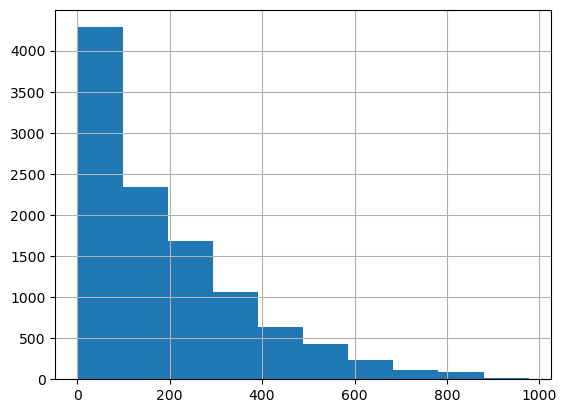

In [8]:
y_target.hist()

<AxesSubplot:>

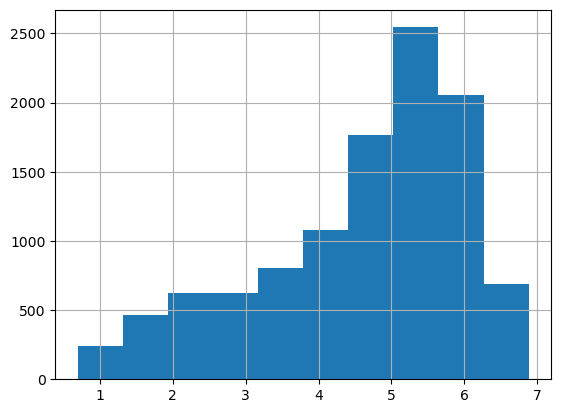

In [9]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()     

In [10]:
# 타깃 컬럼인 count 값을 log1p로 로그 변환
y_target_log = np.log1p(y_target)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, 
                                                    test_size = 0.3, random_state = 0)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 로그 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측값 역시 로그 변환된 target 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.017, RMSE: 162.594, MAE: 109.286


<AxesSubplot:>

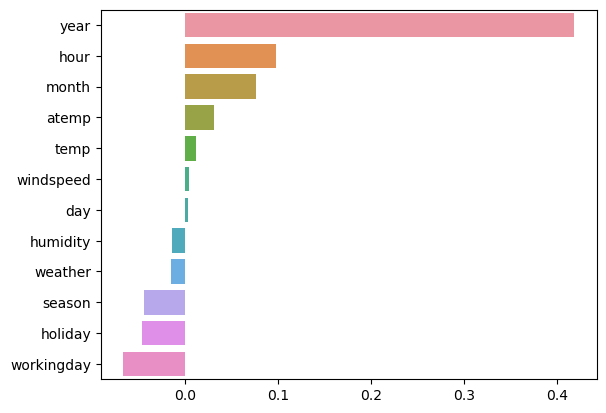

In [11]:
coef = pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [12]:
# 'year', month', 'day', hour' 등의 피처를 One Hot Encoding
X_features_ohe = pd.get_dummies(X_features, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log,
                                                    test_size = 0.3, random_state = 0)

In [13]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)    
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')   
    evaluate_regr(y_test, pred)

In [14]:
# 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg,ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test,y_train, y_test, is_expm1=True)

### LinearRegression ###
RMSLE: 0.590, RMSE: 97.688, MAE: 63.382
### Ridge ###
RMSLE: 0.590, RMSE: 98.529, MAE: 63.893
### Lasso ###
RMSLE: 0.635, RMSE: 113.219, MAE: 72.803


<AxesSubplot:>

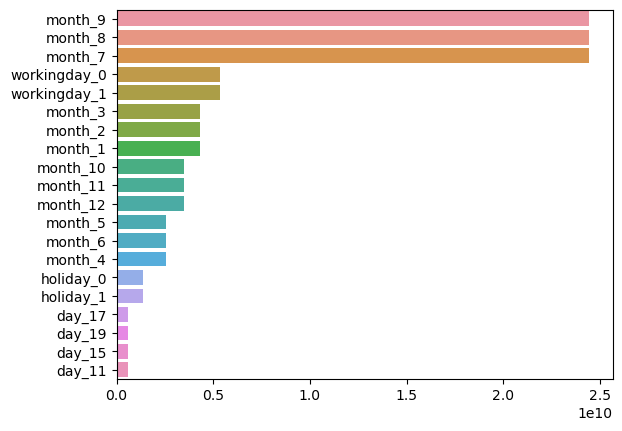

In [15]:
# 회귀 계수 상위 25개 피처를 추출
coef = pd.Series(lr_reg.coef_ , index = X_features_ohe.columns)
coef_sort = coef.sort_values(ascending = False)[:20]
sns.barplot(x = coef_sort.values , y = coef_sort.index)

In [16]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators = 500)
gbm_reg = GradientBoostingRegressor(n_estimators = 500)
xgb_reg = XGBRegressor(n_estimators = 500)
lgbm_reg = LGBMRegressor(n_estimators = 500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model, X_train.values, X_test.values, 
                      y_train.values, y_test.values,is_expm1 = True)

### RandomForestRegressor ###
RMSLE: 0.354, RMSE: 50.271, MAE: 31.128
### GradientBoostingRegressor ###
RMSLE: 0.330, RMSE: 53.317, MAE: 32.731
### XGBRegressor ###
RMSLE: 0.342, RMSE: 51.732, MAE: 31.251
### LGBMRegressor ###
RMSLE: 0.319, RMSE: 47.215, MAE: 29.029
